<a href="https://colab.research.google.com/github/anirbanbagchi1979/bagchi/blob/master/Food_Hub-Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 9 columns and 1898 rows


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [23]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time             1898 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 148.4+ KB


#### Observations:
The different datatypes are int64, object, float64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [22]:
# Check for empty cells using boolean indexing along columns (axis=1)
empty_columns = df.isnull().all(axis=0)
print(empty_columns)
df.isnull().sum()



order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
total_time               False
dtype: bool


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
total_time               0
dtype: int64

#### Observations:
There are no empty values in the data.
But in the rating column there are few rows which are "Not Given".


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [21]:
# Write your code here
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.500,548.050,1476547.00,1477021.25,1477495.50,1477969.750,1478444.00
customer_id,1898.0,171168.478,113698.140,1311.00,77787.75,128600.00,270525.000,405334.00
cost_of_the_order,1898.0,16.499,7.484,4.47,12.08,14.14,22.298,35.41
rating,1898.0,2.660,2.195,0.00,0.00,4.00,5.000,5.00
food_preparation_time,1898.0,27.372,4.632,20.00,23.00,27.00,31.000,35.00
delivery_time,1898.0,24.162,4.973,15.00,20.00,25.00,28.000,33.00
total_time,1898.0,51.534,6.834,35.00,47.00,52.00,56.000,68.00


#### Observations:
Food Prep time
Min = 20
Average = 27.372
Max = 35


### **Question 5:** How many orders are not rated? [1 mark]

In [41]:
# Write the code here
norating_records = df[df['rating']=='Not given'].count()
print(norating_records)

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64


#### Observations:
There are 736 records with 'Not given' rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [43]:
print ("Unique Cusine Type: ", df['cuisine_type'].nunique())
print ("Unique Customers: ", df['customer_id'].nunique())
print ("Unique Resturant Name: ", df['restaurant_name'].nunique())
print ("Days of the weeek: ", df['day_of_the_week'].nunique())

Unique Cusine Type:  14
Unique Customers:  1200
Unique Resturant Name:  178
Days of the weeek:  2


**Observations on Restaurant Name**

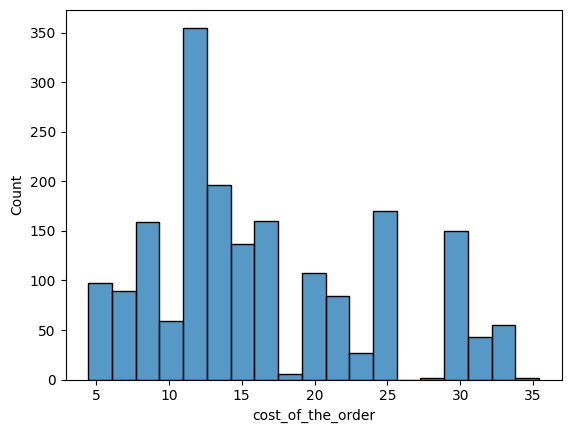

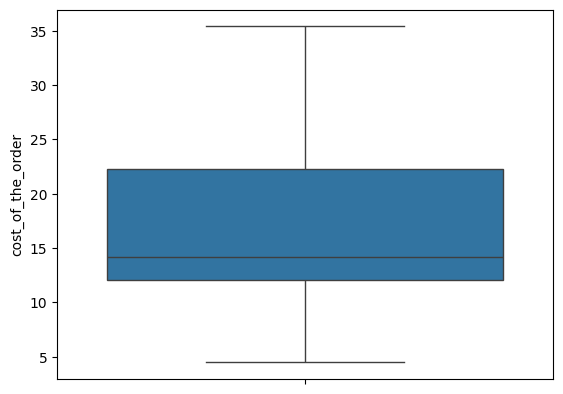

In [47]:
# Write the code here
sns.histplot(df["cost_of_the_order"])
plt.show()

sns.boxplot(data=df['cost_of_the_order'])
plt.show()




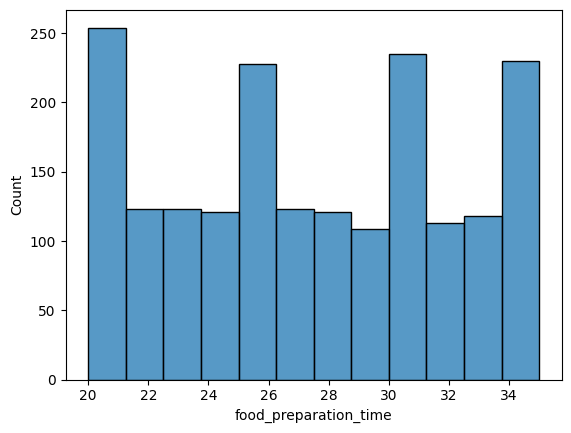

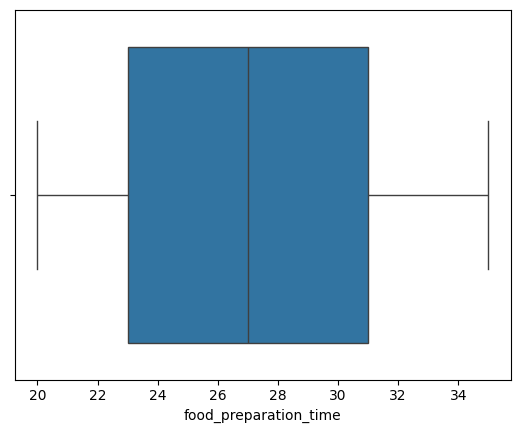

In [48]:
sns.histplot(df["food_preparation_time"])
plt.show()
sns.boxplot(data=df['food_preparation_time'], orient="h")
plt.show()



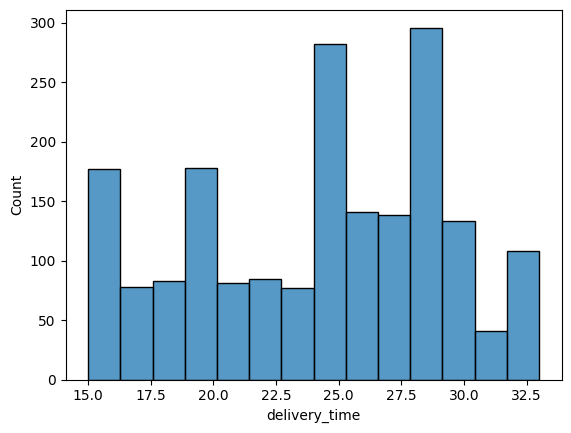

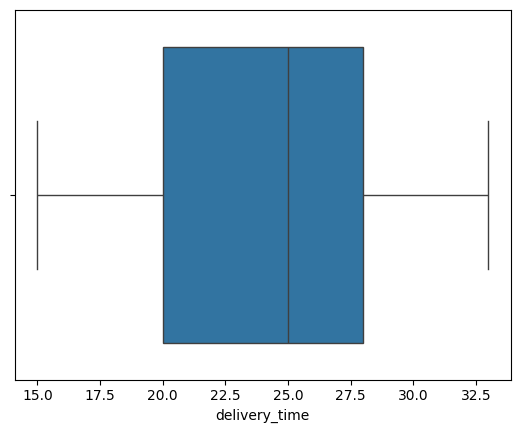

In [51]:
sns.histplot(df["delivery_time"])
plt.show()
sns.boxplot(data=df['delivery_time'], orient="h")
plt.show()



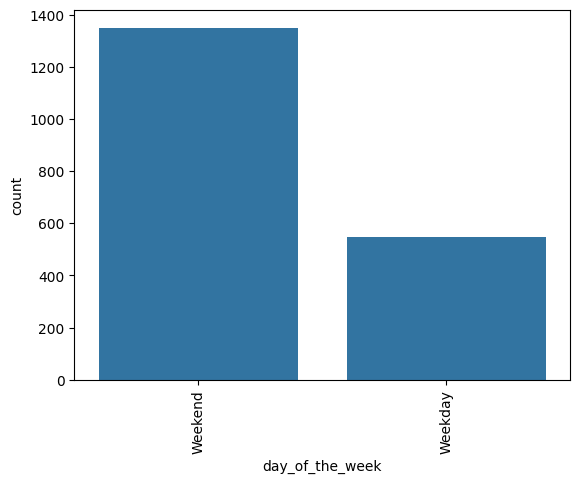

In [52]:
sns.countplot(df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations on Cuisine

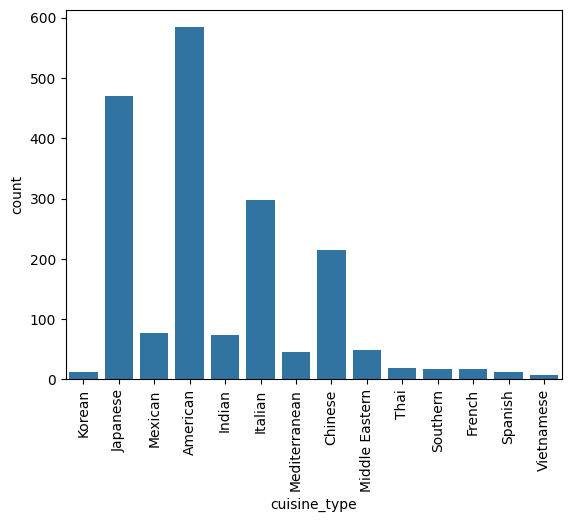

In [57]:
sns.countplot(df,x='cuisine_type');
plt.xticks(rotation=90)
plt.show()

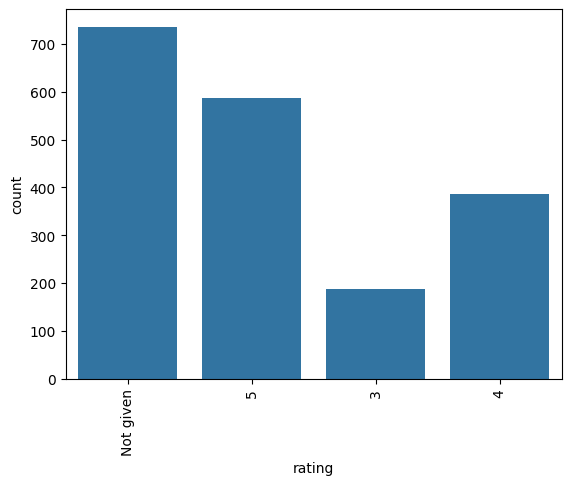

In [58]:
sns.countplot(df,x='rating');
plt.xticks(rotation=90);
plt.show()


Rating


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [59]:
# Write the code here
order_counts = df.groupby('restaurant_name')['order_id'].count()
top_5_orders = order_counts.sort_values(ascending=False).head(5)

# Print the results (restaurant names and order counts)
print(top_5_orders)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
The Top 5 restaurants are Shake Shack, The Meatball Shop, Blue ribbon sushi, blue ribbon fried chicke, Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

weekend_data = df['day_of_the_week']

# Group by cuisine and count orders
weekend_cuisine_counts = df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count()

# Sort by order counts (descending) and get the most popular
most_popular_cuisine = weekend_cuisine_counts.sort_values(ascending=False).index[0]

print("Most popular cuisine on weekends:", most_popular_cuisine)

Most popular cuisine on weekends: American


#### Observations:
Most popular cuisine on weekends: American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [60]:
# Write the code here
orders_more_than20 = df[df['cost_of_the_order'] > 20]

total_orders = len(df)
percentage_expensive = (len(orders_more_than20) / total_orders) * 100

# Format percentage as string with one decimal place
percentage_str = f"{percentage_expensive:.2f}%"

print(percentage_str, "% of orders cost more than $20")

29.24% % of orders cost more than $20


#### Observations:
29.24% % of orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

# Calculate mean delivery time
mean_delivery_time = df['delivery_time'].mean()


print("Mean order delivery time:", str(mean_delivery_time).split('.')[0] , "seconds")

Mean order delivery time: 24 seconds


#### Observations:
Mean order delivery time: 24 seconds


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
order_counts = df.groupby('customer_id')['order_id'].count()
#print(order_counts)
top_3_orders = order_counts.sort_values(ascending=False).head(3)

# Print the results (restaurant names and order counts)
print(top_3_orders)


customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


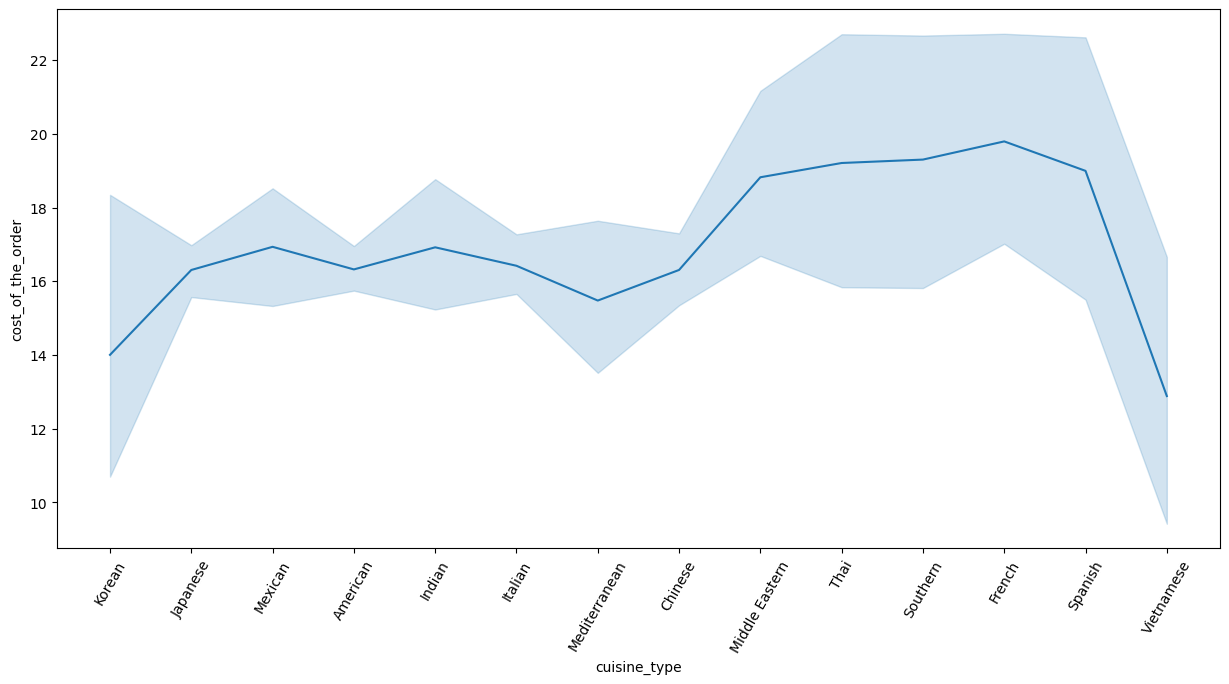

In [61]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.lineplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()


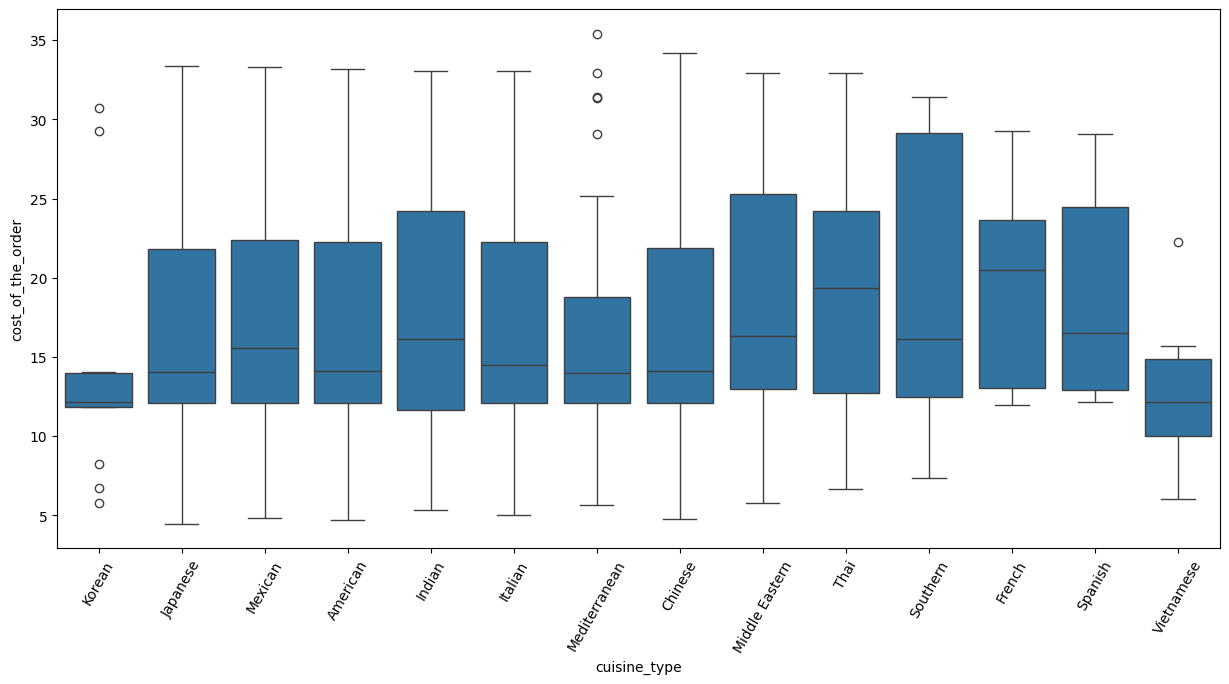

In [62]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

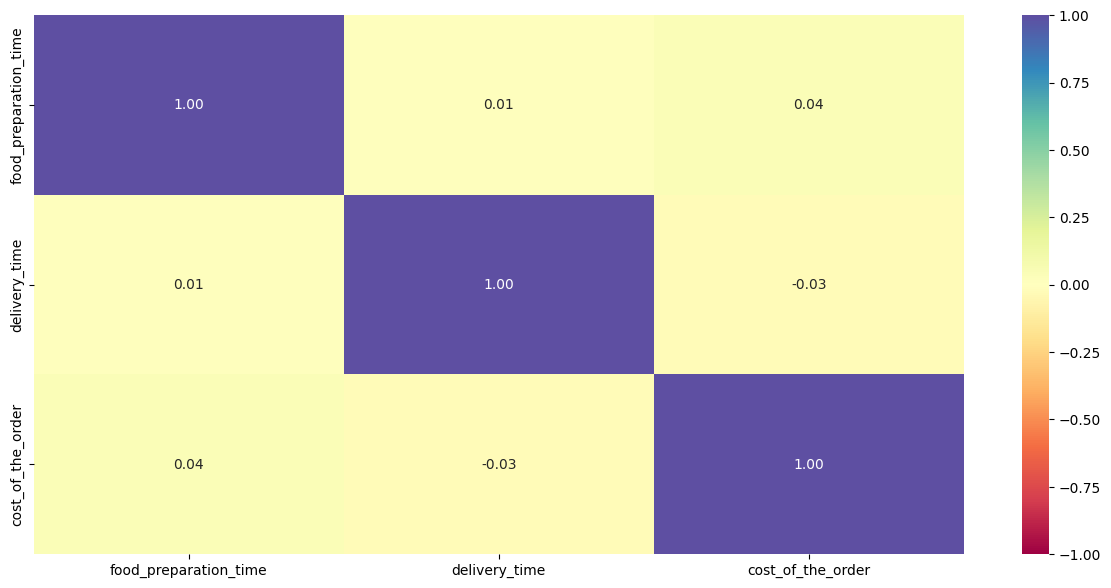

In [65]:
num_var = ['food_preparation_time','delivery_time','cost_of_the_order']
corr = df[num_var].corr()
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

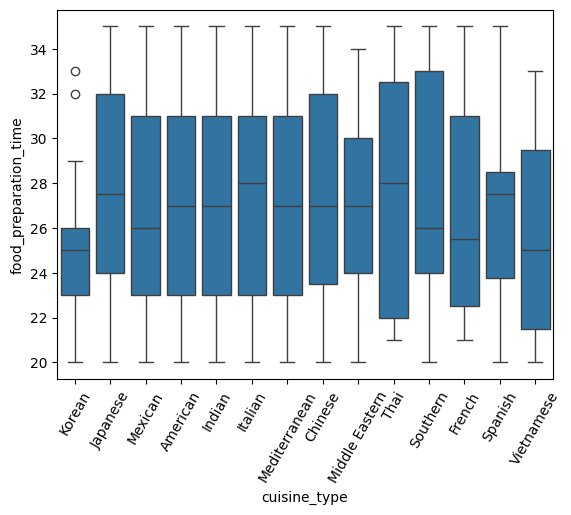

In [66]:
# Relationship between cuisine type and food prep time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

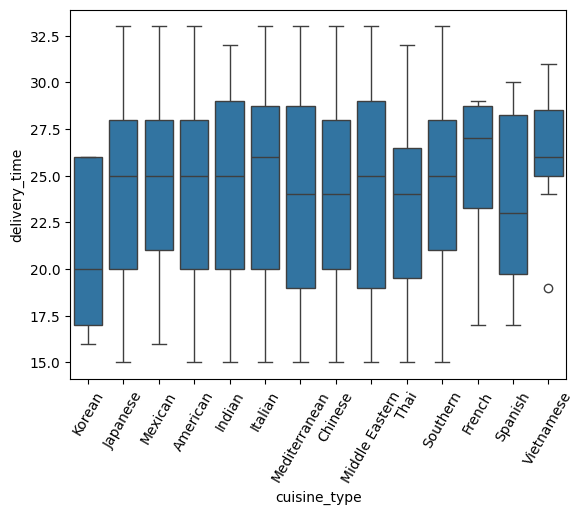

In [67]:
# Relationship between cuisine type and delivery_time
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

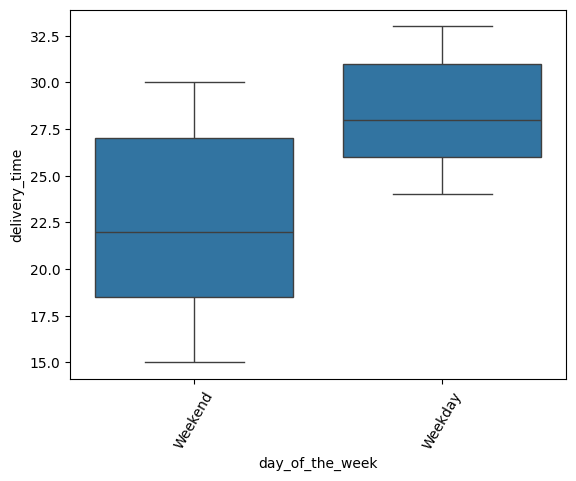

In [68]:
# Relationship between cuisine type and delivery_time
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

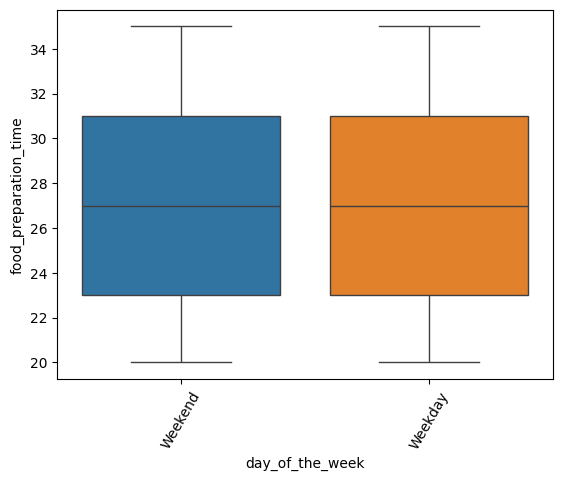

In [69]:
# Relationship between food_preparation_time type and day_of_the_week
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, hue="day_of_the_week")
plt.xticks(rotation = 60)
plt.show()

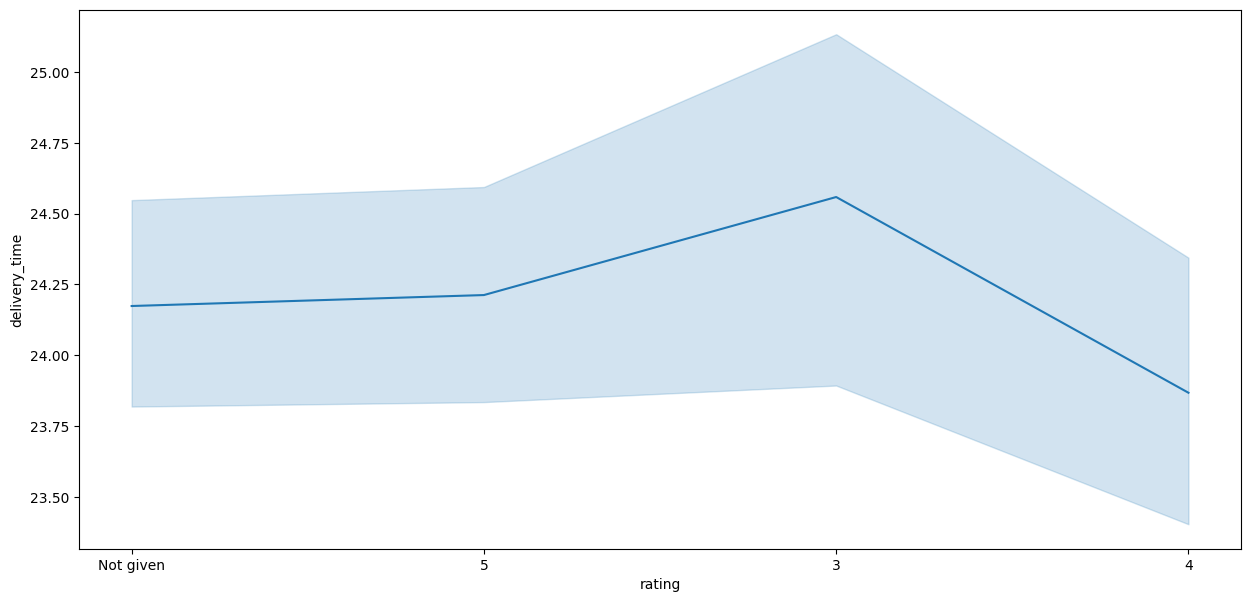

In [70]:
# Relation between rating and delivery time
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

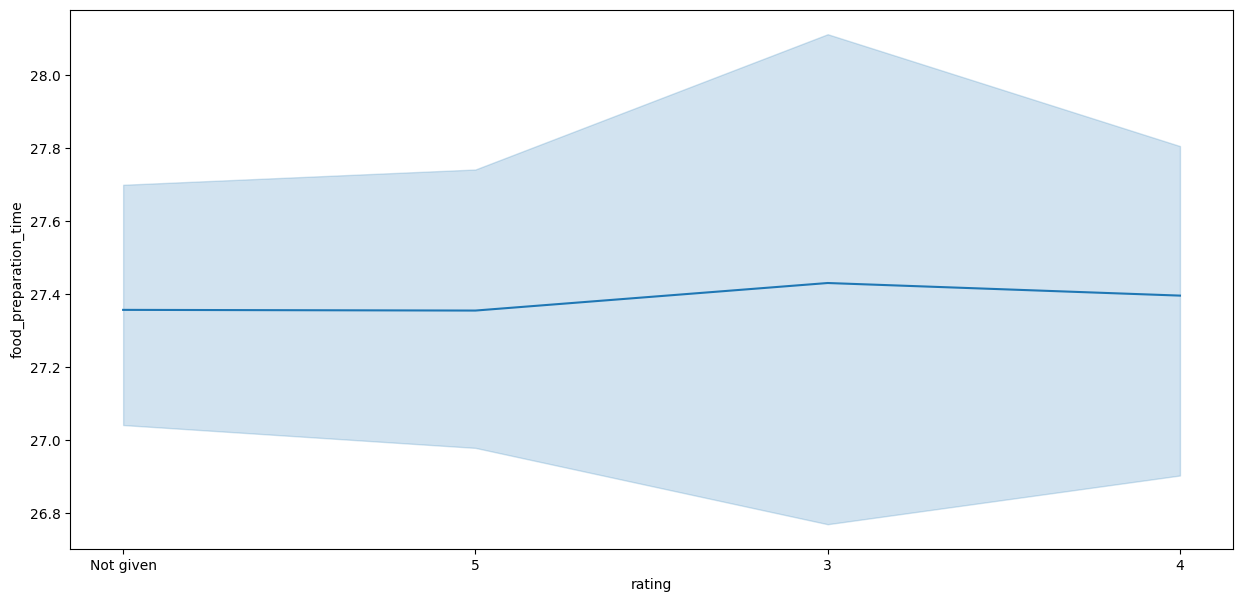

In [71]:
# Relation between rating and prep time
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

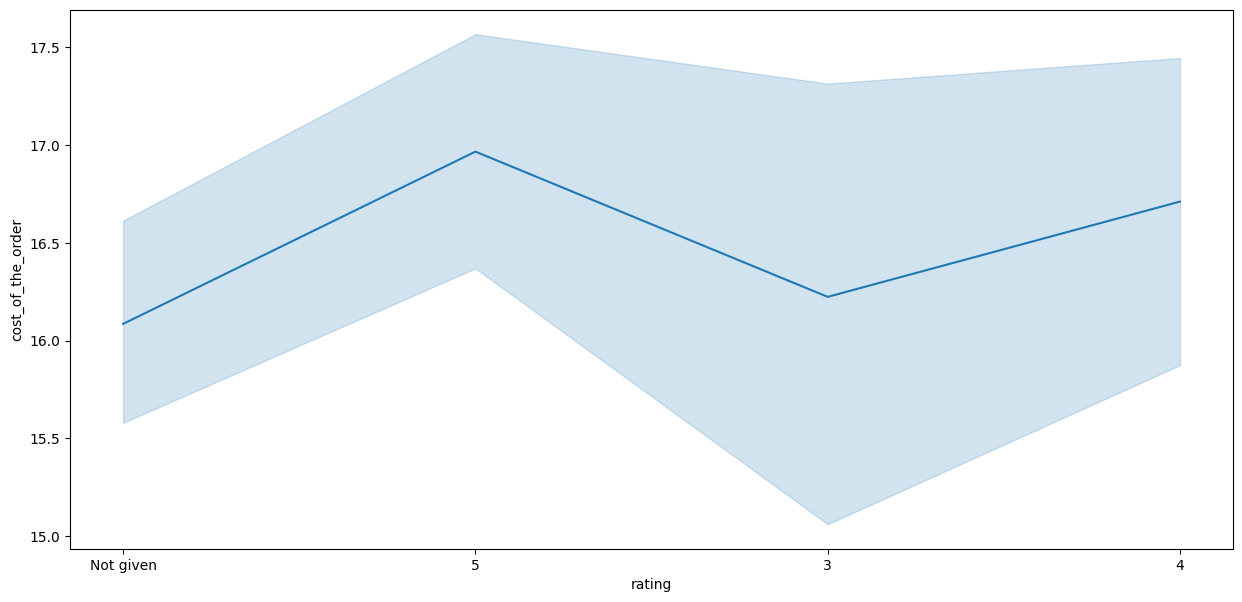

In [72]:
# Relation between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

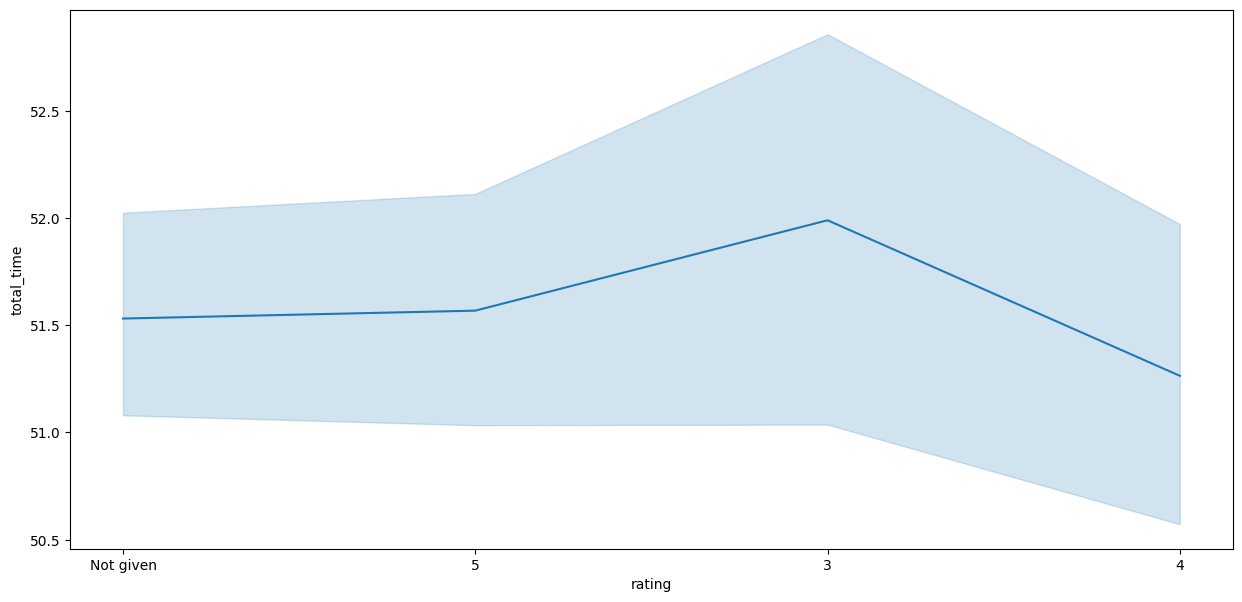

In [75]:
# Relation between rating and prep time
plt.figure(figsize=(15, 7))
df['total_time']=df['delivery_time']+df['food_preparation_time']
sns.lineplot(x = 'rating', y = 'total_time', data = df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [86]:
# Write the code here
# Group DataFrame by 'restaurant_name' and calculate mean rating and rating count
df_rated_restaurants = df[df['rating'] != 'Not given']
restaurant_stats = df_rated_restaurants.groupby('restaurant_name')['rating'].agg(['mean', 'count'])
# Filter restaurants with high ratings and count
top_restaurants = restaurant_stats[(restaurant_stats['mean'] > 4) & (restaurant_stats['count'] > 50)]

# Print results (restaurant name and average rating)
print(top_restaurants.sort_values(by=['count'],ascending=False))

# Sort by order counts (descending) and get the most popular
#most_popular_cuisine = weekend_cuisine_counts.sort_values(ascending=False).index[0]

#print("Most popular cuisine on weekends:", most_popular_cuisine)



                                                                        mean  \
restaurant_name                                                                
Shake Shack                4177018310861161655760709332265111926120530120...   
The Meatball Shop          6494697088756469009504678318529911878052948655...   
Blue Ribbon Sushi          6089773212786788433688123399014801621696704274...   
Blue Ribbon Fried Chicken  5552274147571180791946105747014138735908490420...   

                           count  
restaurant_name                   
Shake Shack                  133  
The Meatball Shop             84  
Blue Ribbon Sushi             73  
Blue Ribbon Fried Chicken     64  


#### Observations:
The Top restaurants are
Shake Shack                    
The Meatball Shop               
Blue Ribbon Sushi               
Blue Ribbon Fried Chicken       

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

commission_rate_above_20 = 0.25
commission_rate_above_5 = 0.15

# Calculate base revenue (order cost)
base_revenue = df['cost_of_the_order']
#print(base_revenue)

# Calculate commission on orders above $20
commission_above_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * commission_rate_above_20
print(commission_above_20.sum())

# Calculate commission on orders between $5 and $20 (if applicable)
commission_between_5_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * commission_rate_above_5
print(commission_between_5_20.sum())

# Total commission
total_commission = commission_above_20.sum() + commission_between_5_20.sum()
print(total_commission)



# Print the total net revenue
print("Total net revenue: $", total_commission)


3688.7275
2477.5755
6166.303
Total net revenue: $ 6166.303


#### Observations:
Total net revenue: $ 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [7]:
# Write the code here


commission_rate_above_20 = 0.25
commission_rate_above_5 = 0.15

# Calculate base revenue (order cost)
prep_time = df['food_preparation_time']
delivery_time = df['delivery_time']
#print(base_revenue)

# Calculate commission on orders above $20
df['total_time'] = prep_time + delivery_time

order_gt_time60 = df[df['total_time'] > 60]



order_pc_gt60 = len(order_gt_time50)/len(df) * 100

print(f"{order_pc_gt60:.2f}% of orders take more than 50 minutes to deliver.")

10.54% of orders take more than 50 minutes to deliver.


#### Observations:
10.54% of orders take more than 50 minutes to deliver.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
weekday_df = df[df['day_of_the_week']=='Weekday'];
weekend_df = df[df['day_of_the_week']=='Weekend'];

mean_delivery_time_weekday = weekday_df['delivery_time'].mean()
mean_delivery_time_weekend = weekend_df['delivery_time'].mean()


print(mean_delivery_time_weekday, "Weekend ",mean_delivery_time_weekend )

28.340036563071298 Weekend  22.4700222057735


### Observations:

Weekend Delivery Time 28.340036563071298   
Weekday Delivery Time 22.4700222057735



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1.  The most popular cuisine is American.

2.  There does not seem to be any co-relation between ratings and cuisine type.

3. French Cuisine has the higher cost of order values.

4. Delivery Time is higher on the Weekdays
5. Order Count is higher in the Weekends




### Recommendations:

*  Company should onboard more

1.   Need to look at other data sources to see why Weekday delivery time is higher. Is it because of congestion? Then we could look at solutions
2.   French cuisine is higher priced, onboarding more restaurants of this type, promotions for this cuisine, can increase revenue even if the number of orders remain the same.
3. The dataset is too small and the slices are even smaller, more data is needed to find patterns



---

In [107]:
!jupyter nbconvert --to html /content/PYF_Project_LearnerNotebook_FullCode_Anirban.ipynb

[NbConvertApp] Converting notebook /content/PYF_Project_LearnerNotebook_FullCode_Anirban.ipynb to html
[NbConvertApp] Writing 2323997 bytes to /content/PYF_Project_LearnerNotebook_FullCode_Anirban.html
